# Intro to Pandas and Data Visualization Workshop
    
![panda](https://aster.cloud/wp-content/uploads/2019/10/python-pandas-install-cover.jpg)

## What is Pandas?
![pandas](https://media.tacdn.com/media/attractions-splice-spp-674x446/07/26/3c/87.jpg)

- Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

- The name Pandas is derived from "panel data". Sadly, it has no relation to real pandas :(.

# How do we use Pandas?
Well, let's start by importing pandas into our notebooks! Along side Pandas, we will be importing a couple more libraries that we will be working with today!

In [218]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> For additional documentation, please visit: https://pandas.pydata.org/pandas-docs/stable/index.html

# Lets get our data!

Our data is often stored in a table, we want to get that table into our notebook!
Data is usually stored as a:
- CSV (comma seperated values)
- Excel (excel sheet document)

In [219]:
county_facts_dict = os.path.join('kaggle-presidential', 'county_facts_dictionary.csv')
#this helps us find the csv if it's in a folder or a different directory
county_facts = os.path.join('kaggle-presidential', 'county_facts.csv')
dem_clean_county_facts = os.path.join('kaggle-presidential', 'dem_clean_county_facts.csv')
dem_clean_state_facts = os.path.join('kaggle-presidential', 'dem_clean_state_facts.csv')
primary_results = os.path.join('kaggle-presidential', 'primary_results.csv')
rep_clean_county_facts = os.path.join('kaggle-presidential', 'rep_clean_county_facts.csv')
rep_clean_state_facts = os.path.join('kaggle-presidential', 'rep_clean_state_facts.csv')
#these are just all the filepaths included in the kaggle-presidential dataset!

# What is a DataFrame?

A dataframe is essentially any sort of tabular data. The variable `df` often stores a dataframe and is short for 'dataframe', but we can use any variable to store our dataframe!

In [220]:
df = pd.read_csv(primary_results)
df.head(5) #this takes the first five entries of our table!

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


## What's a head?
You can see the top few elements of your dataframe using DataFrame.head(). This avoids displaying more of a dataset that is currently needed, and is a nice way of confirming everything has loaded correctly.


# Describing Data
You can use describe() to quickly gather some general insights on your dataset


In [221]:
df.describe()

,fips,votes,fraction_votes
count,2.451100e+04,24611.000000,24611.000000
mean,2.667152e+07,2306.252773,0.304524
std,4.200978e+07,9861.183572,0.231401
min,1.001000e+03,0.000000,0.000000
25%,2.109100e+04,68.000000,0.094000
50%,4.208100e+04,358.000000,0.273000
75%,9.090012e+07,1375.000000,0.479000
max,9.560004e+07,590502.000000,1.000000


# Selecting Data
How can we select data from a DataFrame? There are a couple different ways. <br>
We can pull data out using indexing by column, using dot notation, or by using the actual index of a column.

# Examples
All three of these lines get the exact same thing: the 'Name' column of the DataFrame as a Pandas' Series.

A Pandas' series is essentially just one column of data from our table. Oftentimes, it is formatted as seen below:

In [222]:
df['candidate'].head()
df.iloc[:, 1].head()
df.candidate.head()

0     Bernie Sanders
1    Hillary Clinton
2     Bernie Sanders
3    Hillary Clinton
4     Bernie Sanders
Name: candidate, dtype: object

# DataFrame vs Series
You may have noticed when working with iloc and loc, we get a different
looking output than our DataFrame. These are pandas Series, which are
just the data type that a column (or row) is stored in.

A Series is a one-dimensional array containing information from a row or
column.

# Selection by Column
You can get access to a column by using its name in the same kind of format as you would access an element from an list using its index

In [223]:
df['candidate'].head()

0     Bernie Sanders
1    Hillary Clinton
2     Bernie Sanders
3    Hillary Clinton
4     Bernie Sanders
Name: candidate, dtype: object

# Selection by Column v2
You can index the exact same way, as
before, although instead of using
brackets ‘[ ]’, you can just directly use
the name of the column. There is no real
difference in the two, it is personal
preference. The main downfall is that it
cannot access columns with spaces in the
name.

In [224]:
df.candidate.head()

0     Bernie Sanders
1    Hillary Clinton
2     Bernie Sanders
3    Hillary Clinton
4     Bernie Sanders
Name: candidate, dtype: object

# Selection by index
Selection using iloc works by specifying the row
as the first parameter, and the column as the
second parameter. In this case, ‘:’ indicates that
we want every row, and -1 means that we want
the last column.

More on iloc and loc in a bit.

In [225]:
df.iloc[:, 5].head()

0     Bernie Sanders
1    Hillary Clinton
2     Bernie Sanders
3    Hillary Clinton
4     Bernie Sanders
Name: candidate, dtype: object

# Let's Practice!

How would you get the name of the candidate who has an entry in the third row?

In [226]:
df.iloc[2, 5]

'Bernie Sanders'

# .loc vs .iloc
Both .loc and .iloc can pull out specific rows


In [227]:
df.loc[2]

state                        Alabama
state_abbreviation                AL
county                       Baldwin
fips                            1003
party                       Democrat
candidate             Bernie Sanders
votes                           2694
fraction_votes                 0.329
Name: 2, dtype: object

In [228]:
df.iloc[2]

state                        Alabama
state_abbreviation                AL
county                       Baldwin
fips                            1003
party                       Democrat
candidate             Bernie Sanders
votes                           2694
fraction_votes                 0.329
Name: 2, dtype: object

# .loc vs .iloc
.loc can index by string name, .iloc indexes by integer

In [229]:
df.loc[:, "candidate"].head()

0     Bernie Sanders
1    Hillary Clinton
2     Bernie Sanders
3    Hillary Clinton
4     Bernie Sanders
Name: candidate, dtype: object

In [230]:
df.iloc[:, 6].head() #these are votes!

0     544
1    2387
2    2694
3    5290
4     222
Name: votes, dtype: int64

# Selecting Multiple Columns
You can select multiple
columns by putting each
column name in a list.

In [231]:
df[['candidate', 'votes']]

,candidate,votes
0,Bernie Sanders,544
1,Hillary Clinton,2387
2,Bernie Sanders,2694
3,Hillary Clinton,5290
4,Bernie Sanders,222
...,...,...
24606,Ted Cruz,0
24607,Donald Trump,0
24608,John Kasich,0
24609,Marco Rubio,0


In [232]:
df[['candidate']].head(5) #this also works for single columns

,candidate
0,Bernie Sanders
1,Hillary Clinton
2,Bernie Sanders
3,Hillary Clinton
4,Bernie Sanders


# Cleaning Data
![cleaning](https://miro.medium.com/max/800/1*Xhm9c9qDfXa3ZCQjiOvm_w.jpeg)

Cleaning data is a very important part of exploring data, building machine learning models, and ensuring your discoveries are accurate!

A huge part of the data science project is cleaning and prepping your data!

We need to make sure no data is missing as well as add new columns that could help improve our data!

# Dropping Columns
We can drop columns using `df.drop()`

In our primary data, lets drop the state abbreviation, since it's redundant to have both the state and the abbreviation.

In [82]:
df.drop('state_abbreviation', axis = 1, inplace = True) #we use axis = 1 to drop the column!
#the inplace = true command means that we don't need to set the df equal to itself
df.head(3)

,state,county,fips,party,candidate,votes,fraction_votes
0,Alabama,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329


# Adding Columns

In [88]:
import random
df['County ID'] = [str(random.randint(10000,20000)) + str(random.randint(1, 10)) for i in range(len(df.candidate))]
df.head(3)

,state,county,fips,party,candidate,votes,fraction_votes,County ID
0,Alabama,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,121157
1,Alabama,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,162052
2,Alabama,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329,155765


# Renaming
Instead of `County ID`, maybe we can just name the column `ID` instead!

In [91]:
df.rename(columns = {'County ID': 'ID'}, inplace = True)
df.head(3)

,state,county,fips,party,candidate,votes,fraction_votes,ID
0,Alabama,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182,121157
1,Alabama,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800,162052
2,Alabama,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329,155765


# Replacing Data
Lets replace all `Democrats` with `D` and `Republicans` with `R`.

In [98]:
df.replace('Democrat', 'D', inplace = True)
df.replace('Republican', 'R', inplace = True)
df

,state,county,fips,party,candidate,votes,fraction_votes,ID
0,Alabama,Autauga,1001.0,D,Bernie Sanders,544,0.182,121157
1,Alabama,Autauga,1001.0,D,Hillary Clinton,2387,0.800,162052
2,Alabama,Baldwin,1003.0,D,Bernie Sanders,2694,0.329,155765
3,Alabama,Baldwin,1003.0,D,Hillary Clinton,5290,0.647,1486610
4,Alabama,Barbour,1005.0,D,Bernie Sanders,222,0.078,131515
...,...,...,...,...,...,...,...,...
24606,Wyoming,Teton-Sublette,95600028.0,R,Ted Cruz,0,0.000,116492
24607,Wyoming,Uinta-Lincoln,95600027.0,R,Donald Trump,0,0.000,132784
24608,Wyoming,Uinta-Lincoln,95600027.0,R,John Kasich,0,0.000,177171
24609,Wyoming,Uinta-Lincoln,95600027.0,R,Marco Rubio,0,0.000,143167


# Null Values
Your choice on how to deal with these (but be sure to fit with the context of the data)

Drop them <br>
Fill them with the mean <br>
Fill them backwards or forwards <br>
Fill them with whatever you want <br>

## Null Values
Here's a bunch of null values <br>
How can we fill these?

In [102]:
col = pd.Series([np.nan]*10)
col

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
dtype: float64

## Null values
Fill using anything!

In [103]:
col.fillna(1)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

## Null values
Fill using the mean.

In [104]:
col = pd.Series([2] + [np.nan] * 10 + [1])
col.fillna(col.mean())

0     2.0
1     1.5
2     1.5
3     1.5
4     1.5
5     1.5
6     1.5
7     1.5
8     1.5
9     1.5
10    1.5
11    1.0
dtype: float64

## Null values

Or get rid of them completely!

In [105]:
col = pd.Series([2] + [np.nan] * 10 + [1])
col.dropna()

0     2.0
11    1.0
dtype: float64

# Useful Pandas Functions

# Selecting Data - Conditionals
Use conditionals to select only specific data based on criteria.

In [108]:
df[df['state'] == 'California'].head()

,state,county,fips,party,candidate,votes,fraction_votes,ID
1349,California,Alameda,6001.0,D,Bernie Sanders,91324,0.458,199377
1350,California,Alameda,6001.0,D,Hillary Clinton,107102,0.537,120798
1351,California,Alpine,6003.0,D,Bernie Sanders,129,0.535,148605
1352,California,Alpine,6003.0,D,Hillary Clinton,110,0.456,177667
1353,California,Amador,6005.0,D,Bernie Sanders,1753,0.465,133516


We select specific columns using soemthing called a `boolean series`!

In [109]:
df['state'] == 'California'

0        False
1        False
2        False
3        False
4        False
         ...  
24606    False
24607    False
24608    False
24609    False
24610    False
Name: state, Length: 24611, dtype: bool

# Selecting Data - Multiple Conditionals
What if you want more than one condition to select data?

In [115]:
df[(df['state'] == "Texas") & (df['votes'] >= 1000)]
#this grabs all counties with votes > 1000 in Texas

,state,county,fips,party,candidate,votes,fraction_votes,ID
19116,Texas,Angelina,48005.0,D,Hillary Clinton,1950,0.737,104973
19124,Texas,Atascosa,48013.0,D,Hillary Clinton,1355,0.717,156918
19131,Texas,Bastrop,48021.0,D,Bernie Sanders,1945,0.397,196631
19132,Texas,Bastrop,48021.0,D,Hillary Clinton,2894,0.591,114561
19136,Texas,Bee,48025.0,D,Hillary Clinton,1132,0.751,165923
...,...,...,...,...,...,...,...,...
20865,Texas,Wood,48499.0,R,Donald Trump,3372,0.310,145303
20867,Texas,Wood,48499.0,R,Marco Rubio,1246,0.115,136427
20868,Texas,Wood,48499.0,R,Ted Cruz,5235,0.482,162456
20875,Texas,Young,48503.0,R,Donald Trump,1254,0.298,178826


# Exercise
Pull out the name of all `counties` in `Florida` that have more than `1000` votes.

# Solution

In [116]:
exercise = df[(df["state"] == "Florida") & (df["votes"] > 1000)]
exercise[["county"]]

,county
2627,Alachua
2628,Alachua
2631,Bay
2632,Bay
2634,Bradford
...,...
3021,Walton
3023,Walton
3024,Walton
3025,Washington


# Example
Pull out all the `counties` that have less than `1000 votes` and are not in `Montana`.

In [117]:
exercise = df[(df['votes'] < 1000) & (df['state'] != 'Montana')]
exercise

,state,county,fips,party,candidate,votes,fraction_votes,ID
0,Alabama,Autauga,1001.0,D,Bernie Sanders,544,0.182,121157
4,Alabama,Barbour,1005.0,D,Bernie Sanders,222,0.078,131515
6,Alabama,Bibb,1007.0,D,Bernie Sanders,246,0.197,136107
7,Alabama,Bibb,1007.0,D,Hillary Clinton,942,0.755,170005
8,Alabama,Blount,1009.0,D,Bernie Sanders,395,0.386,185984
...,...,...,...,...,...,...,...,...
24606,Wyoming,Teton-Sublette,95600028.0,R,Ted Cruz,0,0.000,116492
24607,Wyoming,Uinta-Lincoln,95600027.0,R,Donald Trump,0,0.000,132784
24608,Wyoming,Uinta-Lincoln,95600027.0,R,John Kasich,0,0.000,177171
24609,Wyoming,Uinta-Lincoln,95600027.0,R,Marco Rubio,0,0.000,143167


# Proportions
Do you want to know what proportion of the counties are democratic/republican? Great, because it's super easy to find out!

# Summing and Dividing
You can sum a column or
DataFrame’s columns by using
the .sum() function. We can
select our region to be
‘SanDiego’ and sum its volume,
then sum the volume of the entire
dataset.

From there we can calculate our
proportion.

In [120]:
dems = df[df['party'] == 'D'].shape[0]
reps = df[df['party'] == 'R'].shape[0]
total = df.shape[0]
dems/total, reps/total

(0.3640242168136199, 0.63597578318638)

# Exercise 
What is the proportion of `counties` with over `1000 votes` are `republican` in `Florida`?
<br>
num counties republican with >1000 votes/total counties in Florida

In [125]:
counties = df[df['state'] == 'Florida'].shape[0]
rep = df[(df['state'] == 'Florida') & (df['votes'] > 1000) & (df['party'] == 'R')].shape[0]
rep/counties

0.44527363184079605

# Applying
What if you wanted to subtract a number from an entire column? What if
you wanted to use some specific function for every entry in a column?

That’s where apply comes in. You can pass a function into an apply call,
and it will perform that function on every element in the column.

# Subtract the Mean
We are now going to subtract the mean votes from the votes.
First we need to get the mean, then create a simple lambda function to apply!

# Code

In [128]:
mean = df['votes'].mean()
subtract_mean = lambda x: x - mean

df['votes_minus'] = df['votes'].apply(subtract_mean)
df

,state,county,fips,party,candidate,votes,fraction_votes,ID,votes_minus
0,Alabama,Autauga,1001.0,D,Bernie Sanders,544,0.182,121157,-1762.252773
1,Alabama,Autauga,1001.0,D,Hillary Clinton,2387,0.800,162052,80.747227
2,Alabama,Baldwin,1003.0,D,Bernie Sanders,2694,0.329,155765,387.747227
3,Alabama,Baldwin,1003.0,D,Hillary Clinton,5290,0.647,1486610,2983.747227
4,Alabama,Barbour,1005.0,D,Bernie Sanders,222,0.078,131515,-2084.252773
...,...,...,...,...,...,...,...,...,...
24606,Wyoming,Teton-Sublette,95600028.0,R,Ted Cruz,0,0.000,116492,-2306.252773
24607,Wyoming,Uinta-Lincoln,95600027.0,R,Donald Trump,0,0.000,132784,-2306.252773
24608,Wyoming,Uinta-Lincoln,95600027.0,R,John Kasich,0,0.000,177171,-2306.252773
24609,Wyoming,Uinta-Lincoln,95600027.0,R,Marco Rubio,0,0.000,143167,-2306.252773


# Lambda Functions
A lambda function is a one line function!

A lambda function can take any number of arguments, but can only have one expression.

Think of it as a mini-function

In [129]:
lambda x: x + 10

#the x is the parameter
#this is equivalent to 

def doSomething(x):
    return x + 10

# Grouping
- You can take a DataFrame and group the entire thing based on the
unique values of a column, then aggregate how you feel.

- Picking how you want to aggregate your information and setting a
function up can be the tricky part.

# Grouping 
Simple example: group based on the party, sum together each
column of the groups.

In [130]:
df.groupby('party').sum()

,fips,votes,fraction_votes,votes_minus
party,,,,
D,2.916677e+11,27660501,4017.313,6.998782e+06
R,3.620780e+11,29098686,3477.339,-6.998782e+06


# Grouping
You can also group on multiple columns!

In [132]:
df.groupby(['party', 'candidate']).sum()

fips     votes  fraction_votes   votes_minus
party candidate                                                            
D      No Preference   3.246756e+10      8152        2.276000 -8.013427e+05
       Uncommitted     1.890801e+06        43        0.045000 -2.282760e+05
      Bernie Sanders   1.295982e+11  11959102     2074.393879  2.261309e+06
      Hillary Clinton  1.295982e+11  15692452     1939.776121  5.994659e+06
      Martin O'Malley  1.890801e+06       752        0.822000 -2.275670e+05
R     Ben Carson       5.947928e+10    564553       98.373066 -3.284583e+06
      Carly Fiorina    1.890801e+06     15191        2.408571 -2.361906e+05
      Chris Christie   1.890801e+06     24353        1.937211 -2.270286e+05
      Donald Trump     8.046174e+10  13302541     1671.854969  5.032319e+06
      Jeb Bush         3.962917e+06     94411        6.901265 -2.630582e+05
      John Kasich      8.046174e+10   4159949      440.609220 -4.110273e+06
      Marco Rubio      6.120010e+10   3321076      375.479603 -2.571400e+06
      Mike Huckabee    1.890801e+06      3345        2.395000 -2.249740e+05
      Rand Paul        1.890801e+06      8479        3.372000 -2.198400e+05
      Rick Santorum    1.890801e+06      1782        0.986000 -2.265370e+05
      Ted Cruz         8.046174e+10   7603006      873.022095 -6.672164e+05

# Grouping - aggregate
We can use our own functions to group everything using .aggregate

In [133]:
df.groupby('party').aggregate(np.mean)

,fips,votes,fraction_votes,votes_minus
party,,,,
D,3.262867e+07,3087.454069,0.448411,781.201295
R,2.325186e+07,1859.103373,0.222166,-447.149400


# Merging
If you have two tables

that have matching

information, you may

want to merge them.

In [136]:
candidates = df[['candidate', 'votes']]
candidates.head()

,candidate,votes
0,Bernie Sanders,544
1,Hillary Clinton,2387
2,Bernie Sanders,2694
3,Hillary Clinton,5290
4,Bernie Sanders,222


In [138]:
states = df[['state', 'county', 'candidate']]
states.head()

,state,county,candidate
0,Alabama,Autauga,Bernie Sanders
1,Alabama,Autauga,Hillary Clinton
2,Alabama,Baldwin,Bernie Sanders
3,Alabama,Baldwin,Hillary Clinton
4,Alabama,Barbour,Bernie Sanders


We merge like this! There are different types of `'joins'` that we can use to merge tables.
![joins](https://www.upgrad.com/blog/wp-content/uploads/2020/09/Joins-in-SQL-Inner-Outer-Left-and-Right-Join.jpg)

In [143]:
states.merge(candidates, how = 'left', on = 'candidate').head()

,state,county,candidate,votes
0,Alabama,Autauga,Bernie Sanders,544
1,Alabama,Autauga,Bernie Sanders,2694
2,Alabama,Autauga,Bernie Sanders,222
3,Alabama,Autauga,Bernie Sanders,246
4,Alabama,Autauga,Bernie Sanders,395


# Data Visualization
![viz](https://boostlabs.com/wp-content/uploads/2019/09/10-types-of-data-visualization-1.jpg)

# Plotting: Pandas, Seaborn, Matplotlib

* **Matplotlib:** Low-level plotting library built on Numpy; use it directly only when you need to!
* **Pandas (plotting):** `.plot` dataFrame/Series methods conveniently plot tabular data (calls Matplotlib).
* **Seaborn:** A python plotting library similar to R's ggplot; makes common statistical plots easy.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

https://seaborn.pydata.org/examples/index.html

https://pbpython.com/effective-matplotlib.html

https://www.southampton.ac.uk/~fangohr/training/python/notebooks/Matplotlib.html

In [146]:
# magic command for displaying plots in notebook
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

## Plotting in `pandas` is as easy as `.plot()`

* `Series.plot()` plots a column.

In [148]:
data = pd.read_csv('data.csv')
data.head()

,id,x,z0,z1,z2,z3
0,3,0.0000,0.000000,0.000000,-0.000000,0.273816
1,3,0.1001,-0.102628,0.001595,0.052832,-0.487302
2,3,0.2002,-0.223206,0.006378,-0.198124,-0.844929
3,2,0.3003,-0.484955,0.014347,0.126451,-0.357906
4,2,0.4004,0.350514,0.025499,0.439444,0.602113


In [149]:
# select a column from data
z0 = data['z0']
z0.head()

0    0.000000
1   -0.102628
2   -0.223206
3   -0.484955
4    0.350514
Name: z0, dtype: float64

* Use a line plot to plot numeric data.
* `data.plot()` plots a line plot by default.
    - The x-axis is the index by default
    - Can be called out using the key-word argument `x`.

<AxesSubplot:>

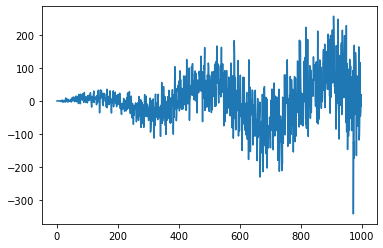

In [150]:
# index is [0...1000]
z0.plot()

In [151]:
# set index to plot correct x-axis
z0 = data.set_index('x').loc[:, 'z0']
z0.head()

x
0.0000    0.000000
0.1001   -0.102628
0.2002   -0.223206
0.3003   -0.484955
0.4004    0.350514
Name: z0, dtype: float64

<AxesSubplot:xlabel='x'>

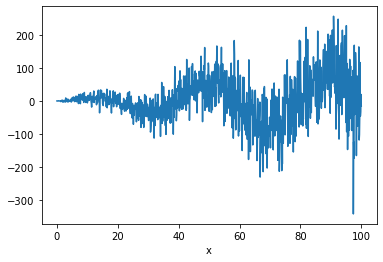

In [152]:
z0.plot()

<AxesSubplot:xlabel='x'>

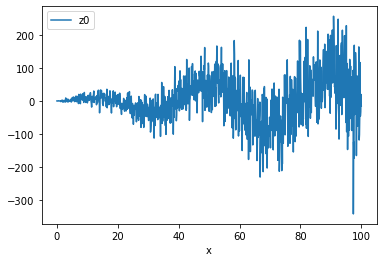

In [153]:
# set x-axis using a keyword argument
data.plot(x='x', y='z0')

### Plotting (quantitative) empirical distributions in Pandas

* Use the key-word argument `kind`
```
kind : str
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    ...
```
* The `hist` keyword by default uses 10 bins, and returns the *count* of observations within those bins.
    - use `density=True` to return a histogram whose area is normalized to 1.

<AxesSubplot:ylabel='Frequency'>

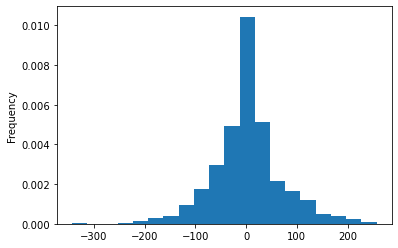

In [154]:
# histogram of z0 values; 
# 25 bins.
# density = normalized histogram

z0.plot(kind='hist', density=True, bins=20)

<AxesSubplot:ylabel='Density'>

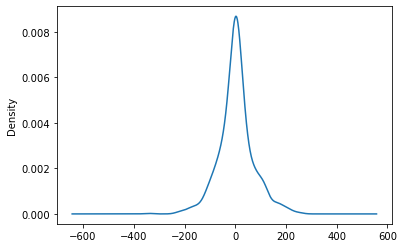

In [155]:
# kernel density estimate of the distribution
# smooth approximation of the empirical distribution

z0.plot(kind='kde')

<AxesSubplot:>

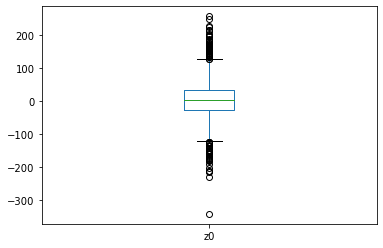

In [156]:
z0.plot(kind='box')

### Plotting (categorical) empirical distributions in Pandas

* Create a distribution from categorical columns using `value_counts`.
* Categorical columns should use *bar charts*.
* Use the key-word argument `kind`
```
kind : str
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    ...
```

In [157]:
empdistr = data['id'].value_counts(normalize=True)
empdistr

3    0.272
0    0.257
1    0.243
2    0.228
Name: id, dtype: float64

<AxesSubplot:>

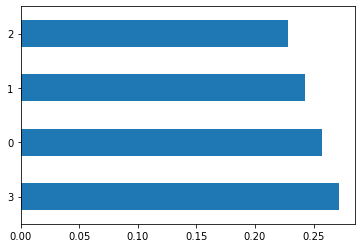

In [158]:
# nominal column
empdistr.plot(kind='barh')

<AxesSubplot:>

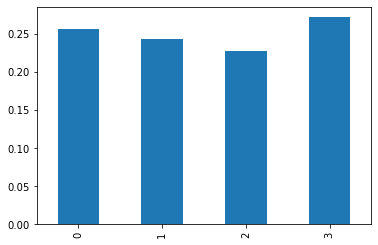

In [159]:
# ordinal column: the x-axis has a meaningful order
empdistr.sort_index().plot(kind='bar')

<AxesSubplot:>

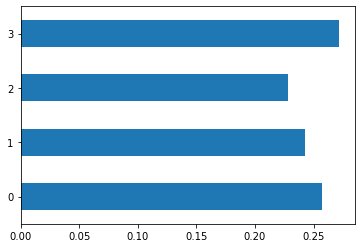

In [160]:
# horizontal bar chart
empdistr.sort_index().plot(kind='barh')

### Plotting `pandas` DataFrames
* `DataFrame.plot()` plots the columns of a dataframe.
* Want multiple plot on the same axis? Get the data into the columns of a dataframe!

In [161]:
data.set_index('x').head()

,id,z0,z1,z2,z3
x,,,,,
0.0000,3,0.000000,0.000000,-0.000000,0.273816
0.1001,3,-0.102628,0.001595,0.052832,-0.487302
0.2002,3,-0.223206,0.006378,-0.198124,-0.844929
0.3003,2,-0.484955,0.014347,0.126451,-0.357906
0.4004,2,0.350514,0.025499,0.439444,0.602113


<AxesSubplot:xlabel='x'>

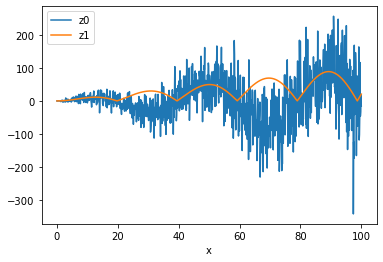

In [162]:
# plot columns 'z0' and 'z1' with 'x' used as the x-axis
data.set_index('x')[['z0', 'z1']].plot()

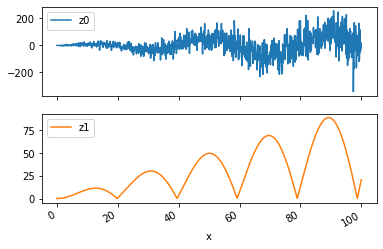

In [163]:
# plot columns 'z0' and 'z1' with 'x' used as the x-axis on seperate plots
data.set_index('x')[['z0', 'z1']].plot(subplots=True);

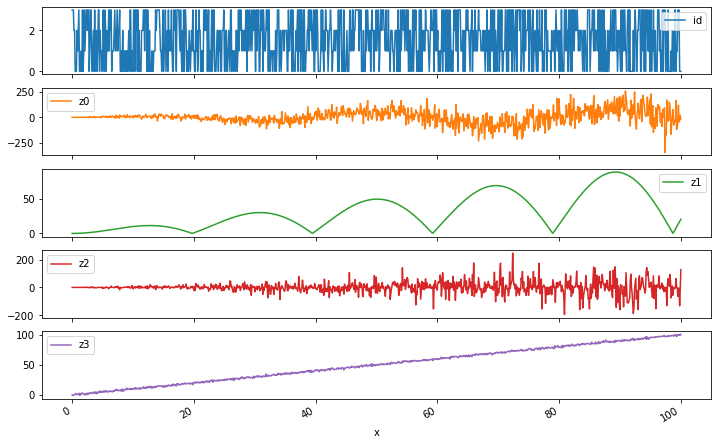

In [164]:
# plot all columns using 'x' as x-axis; elongate plots with 'figsize' keyword
data.set_index('x').plot(subplots=True, figsize=(12,8));

### Scatter-plots with Pandas
* You can create scatter plots with `DataFrame.plot` by passing `kind='scatter'`. Scatter plot requires numeric columns for `x` and `y` axis. 
    * These can be specified by `x` and `y` keywords each.
* To plot multiple column groups in a single axes, repeat plot method specifying target `ax`. It is recommended to specify color and label keywords to distinguish each groups.

<AxesSubplot:xlabel='z0', ylabel='z1'>

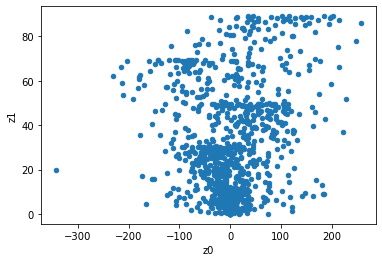

In [166]:
data.plot(kind='scatter', x='z0', y='z1')

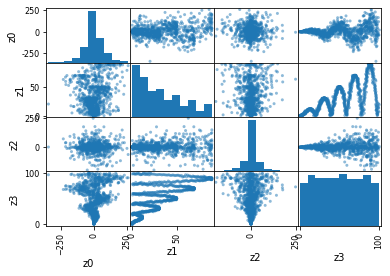

In [172]:
# plot all the histograms and scatterplots in one plot!
# univariate + bivariate analysis
pd.plotting.scatter_matrix(data.drop(['id', 'x'], axis=1));

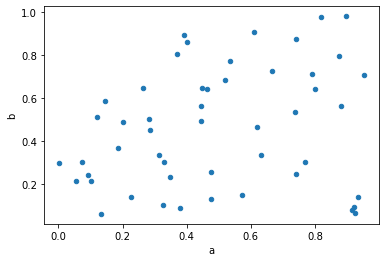

In [173]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

df.plot(kind='scatter', x='a', y='b');

There are other keywords that can be used with scatter. The keyword `c` may be given as the name of a column to provide colors for each point:

In [174]:
samp = data.sample(100)

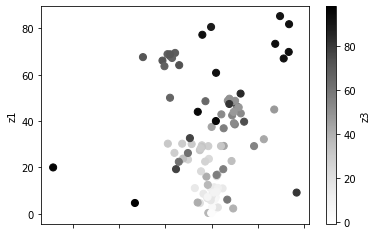

In [175]:
samp.plot(kind='scatter', x='z0', y='z1', c='z3', s=50);

You can pass other keywords supported by matplotlib `scatter`. The example below shows a bubble chart using a dataframe `column` values as bubble size.

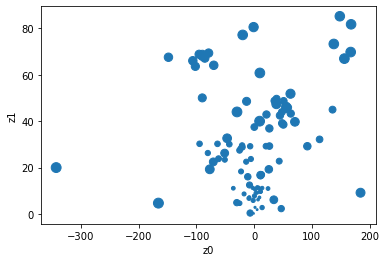

In [177]:
samp.plot(kind='scatter', x='z0', y='z1', s=samp['x']);

### Seaborn: pretty plotting made easy

To install `seaborn`, open a terminal and enter: 

On your laptop:
* `pip install seaborn==0.9`

or, if you are on a shared server (e.g. on `datahub.ucsd.edu`):

* `pip install --user seaborn==0.9`

The `seaborn` documentation has a *great* series of tutorials: https://seaborn.pydata.org/tutorial.html


In [179]:
import seaborn as sns
sns.__version__

'0.11.0'

#### `sns.scatterplot`
* The relationship between `x` anmn be shown for different subsets of the data using the `hue`, `size`, and `style` parameters. 
* These parameters control what visual semantics are used to identify the different subsets. 
* It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. 
    * Using redundant semantics (i.e. both `hue` and `style` for the same variable) can be helpful for making graphics more accessible.

Show a quantitative variable by using continuous colors:

<AxesSubplot:xlabel='z0', ylabel='z1'>

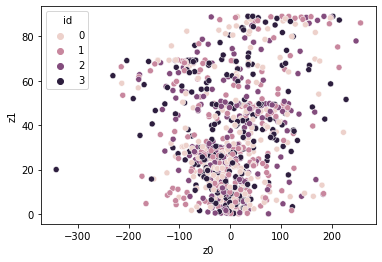

In [186]:
sns.scatterplot(data=data, x='z0', y='z1', hue='id')

Also show a quantitative variable by varying the size of the points:

<AxesSubplot:xlabel='z0', ylabel='z1'>

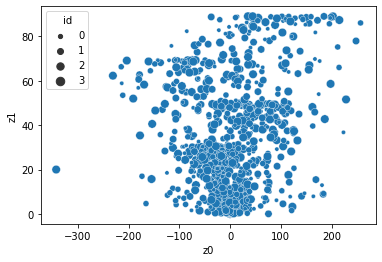

In [187]:
sns.scatterplot(data=data, x='z0', y='z1', size='id')

#### `sns.lmplot`

Plot a simple linear relationship between two variables:

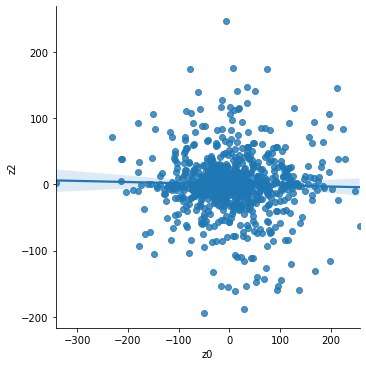

In [188]:
# plot a line of best fit
sns.lmplot(data=data, x='z0', y='z2');

#### `sns.distplot`

Plot the distribution with a histogram, kernel density estimate, and rug plot:

/Users/brianhuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/brianhuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z3', ylabel='Density'>

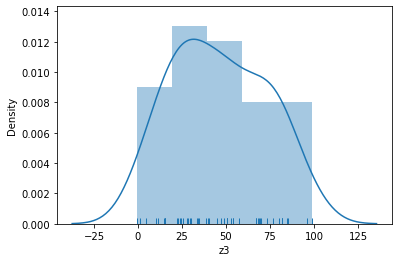

In [189]:
z3 = data.sample(50)['z3']
sns.distplot(z3, hist=True, kde=True, rug=True)

#### `sns.boxplot`

Draw a vertical boxplot grouped by a categorical variable:

<AxesSubplot:xlabel='id', ylabel='z2'>

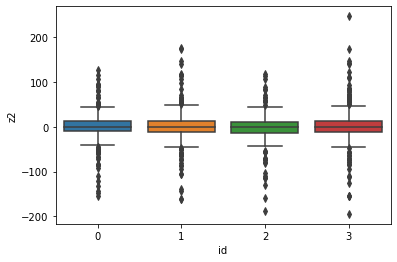

In [191]:
sns.boxplot(data=data, x='id', y='z2')

## Custom plots with `matplotlib`

* There are other great resources for learning the matplotlib API, for example, [this tutorial](https://www.southampton.ac.uk/~fangohr/training/python/notebooks/Matplotlib.html)

In [193]:
import matplotlib.pyplot as plt

### Matplotlib `axes` objects and Pandas plots

* An 'Axes' object contains the elements of a single plot.
    - contains a coordinate system (axis elements), 
    - the plot elements (e.g. line, bar), 
    - labels, 
    - tick-marks, etc.
    
* A `DataFrame.plot()` method call returns an `axes` object

<AxesSubplot:xlabel='x'>

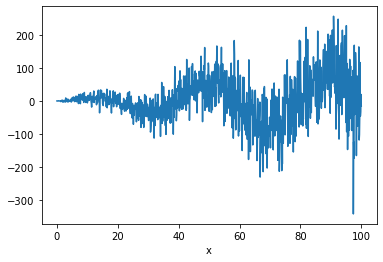

In [200]:
# notice the <matplotlib.axes._subplots.AxesSubplot at 0x1a21f7bcf8>
data.set_index('x')['z0'].plot()

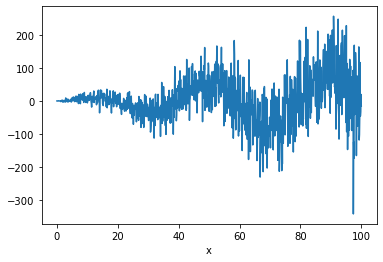

In [201]:
# save the plot as an variable
ax = data.set_index('x')['z0'].plot()

In [202]:
# get name of x-axis
ax.get_xlabel()

'x'

In [203]:
# get y-axis tick-labels
list(ax.get_yaxis().get_majorticklabels())

[Text(0, -400.0, '−400'),
 Text(0, -300.0, '−300'),
 Text(0, -200.0, '−200'),
 Text(0, -100.0, '−100'),
 Text(0, 0.0, '0'),
 Text(0, 100.0, '100'),
 Text(0, 200.0, '200'),
 Text(0, 300.0, '300')]

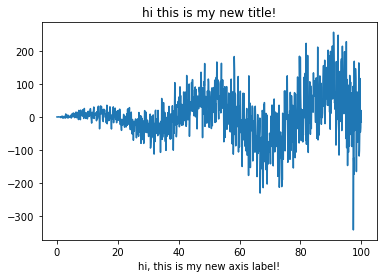

In [204]:
ax = data.set_index('x')['z0'].plot()
ax.set_xlabel('hi, this is my new axis label!')
ax.set_title('hi this is my new title!');

#### You can add elements to an Axes object

* The Pandas `.plot` method can add a plot to an existing Axes object using the `ax` keyword

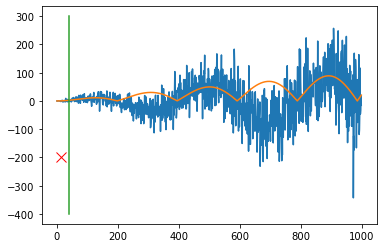

In [205]:
ax = data['z0'].plot()

# add z1 to Axes
data['z1'].plot(ax=ax)

# add a vertical line using matplotlib
plt.plot([40,40],[-400, 300])

# add a point using matplotlib
plt.plot(15,-200, marker='x', markersize=10, color='red')

#### You can add a scatterplot to an existing scatterplot

<AxesSubplot:xlabel='z0', ylabel='z3'>

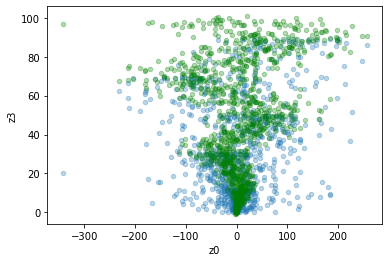

In [207]:
ax = data.plot(kind='scatter', x='z0', y='z1', alpha=0.3)

# the 'ax' keyword in Pandas plot method attaches the new plot to an existing Axes object
data.plot(kind='scatter', x='z0', y='z3', ax=ax, c='g', alpha=0.3)

### Matplotlib `figure` and adding to empty subplots

* A 'Figure' object is a top-level container for all plotting objects.
    - controls overall size, title, fonts, coordination between different elements of subplots.

<img src="https://i.stack.imgur.com/HZWkV.png" width="25%">  

* Instantiate an empty figure containing multiple plots with `plt.subplots`
    - `fig, axes = plt.subplots(R, C)` returns a figure `fig` and an multi-array of `axes`.
    - `axes` has `R` rows and `C` columns corresponding to the subplots laid out on a grid.
    - The `axes` are initially empty; they need to be given data to plot.
   

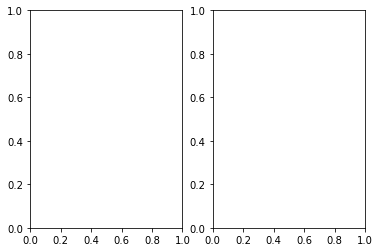

In [213]:
fig, axes = plt.subplots(1, 2)

In [210]:
len(axes), type(axes), type(axes[0])

(2, numpy.ndarray, matplotlib.axes._subplots.AxesSubplot)

<AxesSubplot:title={'center':'z1'}, xlabel='x'>

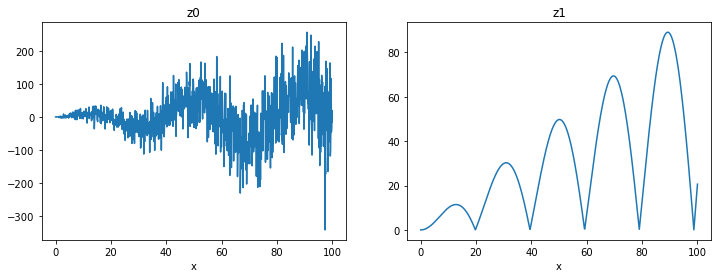

In [214]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

df = data.set_index('x')
df['z0'].plot(ax=axes[0], title='z0')
df['z1'].plot(ax=axes[1], title='z1')

<AxesSubplot:title={'center':'z1'}, xlabel='x'>

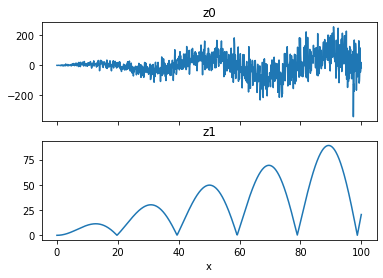

In [215]:
fig, axes = plt.subplots(2, 1, sharex=True)

df = data.set_index('x')
df['z0'].plot(ax=axes[0], title='z0')
df['z1'].plot(ax=axes[1], title='z1')

## Thank you for coming to our workshop today!